In [1]:
import sglang as sgl
import asyncio

# llm = sgl.Engine(model_path="deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B")
# llm = sgl.Engine(model_path="stabilityai/stablelm-2-1_6b")
llm = sgl.Engine(model_path="HuggingFaceTB/SmolLM2-1.7B-Instruct")
# llm = sgl.Engine(model_path="meta-llama/Llama-3.2-3B-Tnstruct")

/home/quoppo/sglang1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-30 13:33:15,590	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:00<00:00,  1.46it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:00<00:00,  1.46it/s]

100%|██████████| 4/4 [00:01<00:00,  3.50it/s]


In [4]:
# Streaming Synchronous Generation

prompts = [
    "Write a one poem on soldier.",
]
sampling_params = {"temperature": 0.8, "top_p": 0.95}

print("\n=== Testing synchronous streaming generation ===")

for prompt in prompts:
    print(f"\nPrompt: {prompt}")
    print("Generated text: ", end="", flush=True)

    for chunk in llm.generate(prompt, sampling_params, stream=True):
        print(chunk["text"], end="", flush=True)
    print()


=== Testing synchronous streaming generation ===

Prompt: Write a one poem on soldier.
Generated text: 


In [1]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 39.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 8.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 25.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.0 MB/s eta 0:00:0000:01


/home/quoppo/sglang1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-30 13:59:01,452	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:00<00:00,  2.78it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:00<00:00,  2.77it/s]

100%|██████████| 4/4 [-1:59:11<00:00, -0.08it/s]



=== Performance Metrics ===
Prompt                         Tokens     Time (s)   Memory (MB) GPU Mem (MB) Tokens/s  

Prompt: What is your name?
Generated text: 

What
What are
What are the
What are the Grand
What are the Grand B
What are the Grand Banks
What are the Grand Banks'
What are the Grand Banks' views
What are the Grand Banks' views on
What are the Grand Banks' views on the
What are the Grand Banks' views on the U
What are the Grand Banks' views on the U.
What are the Grand Banks' views on the U.S
What are the Grand Banks' views on the U.S.
What are the Grand Banks' views on the U.S. economy
What are the Grand Banks' views on the U.S. economy?
What are the Grand Banks' views on the U.S. economy?
                               112        0.80       0.08       30.00        140.40    

Prompt: What is the capital of France?
Generated text: 

The
The capital
The capital of
The capital of France
The capital of France is
The capital of France is Paris
The capital of France is Pari

/tmp/ipykernel_16601/1921908152.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prompts_list, y=tokens_list, ax=axes[0, 0], palette="Blues")
/tmp/ipykernel_16601/1921908152.py:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(prompts_list, rotation=30, ha="right")
/tmp/ipykernel_16601/1921908152.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prompts_list, y=time_list, ax=axes[0, 1], palette="Oranges")
/tmp/ipykernel_16601/1921908152.py:112: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocat

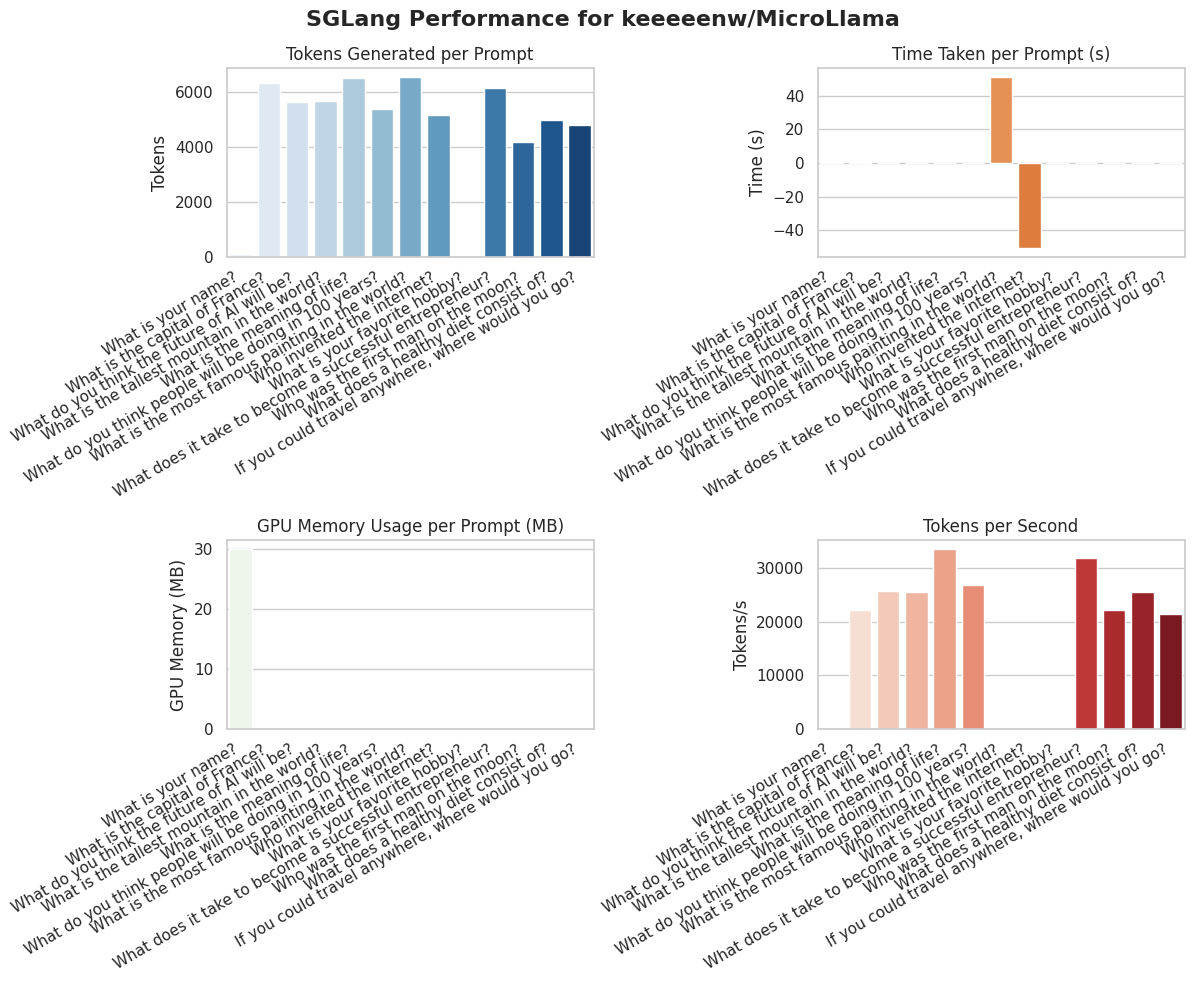

In [1]:
import time
import psutil
import tracemalloc
import pynvml
import sglang as sgl
import seaborn as sns
import matplotlib.pyplot as plt
# model_path="Qwen/Qwen2.5-Coder-1.5B-Instruct"
# model_path="HuggingFaceTB/SmolLM2-360M-Instruct"
# model_path="HuggingFaceTB/SmolLM2-1.7B-Instruct"
# model_path="Qwen/Qwen2.5-1.5B-Instruct"-
model_path="keeeeenw/MicroLlama"
# Initialize LLM
# llm = sgl.Engine(model_path="NousResearch/Hermes-3-Llama-3.2-3B")
llm = sgl.Engine(model_path=model_path)

# Lists to store performance metrics
prompts_list = []
tokens_list = []
time_list = []
memory_list = []
gpu_memory_list = []
tokens_per_sec_list = []

def monitor_generation(prompts, sampling_params):
    """
    Measures token generation speed, time, and resource usage (CPU, memory, and GPU) while generating text.
    Stores data for visualization with Seaborn.
    """
    tracemalloc.start()
    pynvml.nvmlInit()
    start_time = time.time()
    total_tokens = 0
    gpu_handle = pynvml.nvmlDeviceGetHandleByIndex(0)

    print("\n=== Performance Metrics ===")
    print(f"{'Prompt':<30} {'Tokens':<10} {'Time (s)':<10} {'Memory (MB)':<10} {'GPU Mem (MB)':<12} {'Tokens/s':<10}")

    for prompt in prompts:
        print(f"\nPrompt: {prompt}")
        prompt_start_time = time.time()
        snapshot_before = tracemalloc.take_snapshot()
        prompt_token_count = 0
        gpu_mem_before = pynvml.nvmlDeviceGetMemoryInfo(gpu_handle).used / (1024 * 1024)

        print("Generated text: ", end="", flush=True)
        for chunk in llm.generate(prompt, sampling_params, stream=True):
            text = chunk["text"]
            print(text, end="", flush=True)
            prompt_token_count += len(text.split())

        prompt_end_time = time.time()
        snapshot_after = tracemalloc.take_snapshot()

        memory_diff = snapshot_after.compare_to(snapshot_before, "lineno")
        total_memory = sum(stat.size_diff for stat in memory_diff) / (1024 * 1024)
        gpu_mem_after = pynvml.nvmlDeviceGetMemoryInfo(gpu_handle).used / (1024 * 1024)
        gpu_memory_used = gpu_mem_after - gpu_mem_before
        prompt_time = prompt_end_time - prompt_start_time
        tokens_per_second = prompt_token_count / prompt_time if prompt_time > 0 else 0
        total_tokens += prompt_token_count

        # Store data for visualization
        prompts_list.append(prompt)
        tokens_list.append(prompt_token_count)
        time_list.append(prompt_time)
        memory_list.append(total_memory)
        gpu_memory_list.append(gpu_memory_used)
        tokens_per_sec_list.append(tokens_per_second)

        print(f"\n{'':<30} {prompt_token_count:<10} {prompt_time:<10.2f} {total_memory:<10.2f} {gpu_memory_used:<12.2f} {tokens_per_second:<10.2f}")

    end_time = time.time()
    total_time = end_time - start_time

    # CPU & Memory usage
    process = psutil.Process()
    cpu_usage = process.cpu_percent(interval=0.1)
    memory_usage = process.memory_info().rss / (1024 * 1024)
    gpu_utilization = pynvml.nvmlDeviceGetUtilizationRates(gpu_handle).gpu

    # Print overall stats
    print("\n=== Overall Metrics ===")
    print(f"Total Tokens: {total_tokens}")
    print(f"Total Time: {total_time:.2f} seconds")
    print(f"Average Tokens/s: {total_tokens / total_time:.2f}")
    print(f"CPU Usage: {cpu_usage:.2f}%")
    print(f"Memory Usage: {memory_usage:.2f} MB")
    print(f"GPU Utilization: {gpu_utilization:.2f}%")

    # Shutdown NVML
    pynvml.nvmlShutdown()

def visualize_results():
    """
    Uses Seaborn to visualize performance metrics.
    """
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"SGLang Performance for {model_path}", fontsize=16, fontweight='bold')

    # Tokens per prompt
    sns.barplot(x=prompts_list, y=tokens_list, ax=axes[0, 0], palette="Blues")
    axes[0, 0].set_title("Tokens Generated per Prompt")
    axes[0, 0].set_ylabel("Tokens")
    axes[0, 0].set_xticklabels(prompts_list, rotation=30, ha="right")

    # Time per prompt
    sns.barplot(x=prompts_list, y=time_list, ax=axes[0, 1], palette="Oranges")
    axes[0, 1].set_title("Time Taken per Prompt (s)")
    axes[0, 1].set_ylabel("Time (s)")
    axes[0, 1].set_xticklabels(prompts_list, rotation=30, ha="right")

    # GPU memory usage
    sns.barplot(x=prompts_list, y=gpu_memory_list, ax=axes[1, 0], palette="Greens")
    axes[1, 0].set_title("GPU Memory Usage per Prompt (MB)")
    axes[1, 0].set_ylabel("GPU Memory (MB)")
    axes[1, 0].set_xticklabels(prompts_list, rotation=30, ha="right")

    # Tokens per second
    sns.barplot(x=prompts_list, y=tokens_per_sec_list, ax=axes[1, 1], palette="Reds")
    axes[1, 1].set_title("Tokens per Second")
    axes[1, 1].set_ylabel("Tokens/s")
    axes[1, 1].set_xticklabels(prompts_list, rotation=30, ha="right")

    plt.tight_layout()
    plt.show()

# Define prompts and sampling parameters
prompts = [
        "What is your name?",
        "What is the capital of France?",
        "What do you think the future of AI will be?",
        "What is the tallest mountain in the world?",
        "What is the meaning of life?",
        "What do you think people will be doing in 100 years?",
        "What is the most famous painting in the world?",
        "Who invented the internet?",
        "What is your favorite hobby?",
        "What does it take to become a successful entrepreneur?",
        "Who was the first man on the moon?",
        "What does a healthy diet consist of?",
        "If you could travel anywhere, where would you go?"
    ]
sampling_params = {"temperature": 0.8, "top_p": 0.95}

# Run the monitoring function
monitor_generation(prompts, sampling_params)

# Visualize results
visualize_results()